### EDA (Análisis exploratorio de datos)

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos el dataset

In [210]:
df = pd.read_excel('Datasets/data.xlsx')
df.head(1)

,id_hecho,cant_victimas,fecha,año,mes,dia,dia_de_la_semana,hora,franja_horaria,lugar,tipo_de_calle,calle,altura,cruce,comuna,longitud,latitud,participantes,victima,acusado,rol,sexo,edad
0,2016-0001,1,2016-01-01,2016,1,1,Friday,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",8,-58.47534,-34.68757,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19


## Análisis descriptivo

In [211]:
df.shape

(717, 23)

In [212]:
df.describe()

,cant_victimas,año,mes,dia,franja_horaria,altura,comuna,longitud,latitud,edad
count,717.000000,717.000000,717.000000,717.000000,717.000000,133.000000,717.000000,704.000000,704.000000,717.000000
mean,1.061367,2018.174338,6.688982,15.953975,11.548117,3384.187970,7.430962,-58.441664,-34.619700,41.785216
std,0.257024,1.672655,3.575140,8.674876,6.697535,3095.161836,4.385067,0.046397,0.035292,19.089576
min,1.000000,2016.000000,1.000000,1.000000,0.000000,30.000000,0.000000,-58.529942,-34.705250,1.000000
25%,1.000000,2017.000000,4.000000,9.000000,6.000000,1366.000000,4.000000,-58.476556,-34.643918,28.000000
50%,1.000000,2018.000000,7.000000,16.000000,11.000000,2639.000000,8.000000,-58.444513,-34.622866,37.000000
75%,1.000000,2019.000000,10.000000,23.000000,17.000000,4500.000000,11.000000,-58.401841,-34.597013,55.000000
max,3.000000,2021.000000,12.000000,31.000000,23.000000,16080.000000,15.000000,-58.356082,-34.534654,95.000000




Composicion de la tabla: consta de 717 registros y 23 columnas, las columnas mas relevantes son: cantidad de victimas, tipo de calle, victima, rol, sexo, fecha y hora.

## Análisis de victimas
### Género
Vamos a comenzar  a ver como se distribuye la cantidad de accidentes en funcion del género



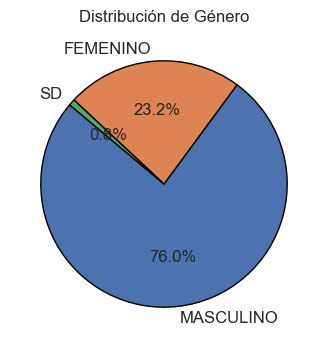

In [242]:
# Calcular el conteo de cada categoría
conteo_genero = df['sexo'].value_counts()

# Configurar la figura
plt.figure(figsize=(4,4))

# Crear el diagrama de pastel
plt.pie(conteo_genero, labels=conteo_genero.index, autopct='%1.1f%%', wedgeprops={"linewidth": 1, "edgecolor": "black"}, startangle=140, colors=sns.color_palette('deep'), textprops={'fontsize': 12})

# Añadir título
plt.title('Distribución de Género')

# Mostrar el diagrama de pastel
plt.show()

Claramente en la mayor parte de los accidentes fatales está involucrado el género masculino, esto se pude deber al exceso de confianza y falta de prudencia al conducir.

### Edad
Se realiza un histograma para ver la frecuencia de las edades

C:\Users\Acer\AppData\Local\Temp\ipykernel_14440\3792183733.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['edad'], bins=7, kde=True, edgecolor = 'black',palette='viridis')


Text(0, 0.5, 'Frecuencia De edad')

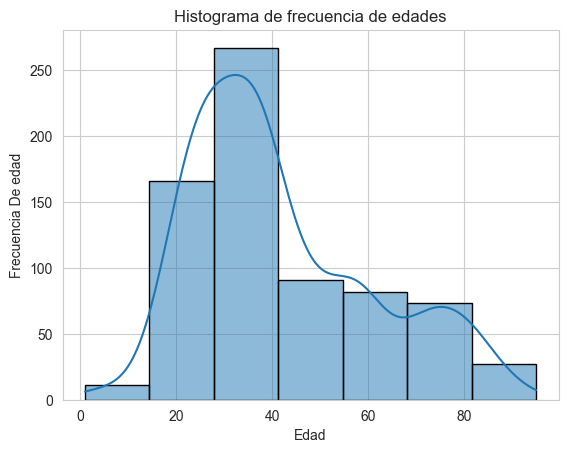

In [214]:
sns.set_style("whitegrid")

# Crear el histograma
sns.histplot(df['edad'], bins=7, kde=True, edgecolor = 'black',palette='viridis')

# Añadir título y etiquetas
plt.title('Histograma de frecuencia de edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia De edad')

El grueso de la poblacion que muere en accidentes de transito se ubica en el rango de 27 a 41 años, con una frecuencia de 275 

### Tipo de victima

Para evaluar este item se hace un grafica de barras horizontales, se hace un dataframe agrupando la cantidad de victimas por  tipo de victima

In [219]:
df_tipo_victima = df.groupby('victima')['cant_victimas'].sum().reset_index()
df_tipo_victima = df_tipo_victima.sort_values(by='cant_victimas', ascending= False)

C:\Users\Acer\AppData\Local\Temp\ipykernel_14440\463555283.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cant_victimas', y='victima', data=df_tipo_victima, edgecolor = 'black',palette='Dark2')


Text(0, 0.5, 'Tipo de victima')

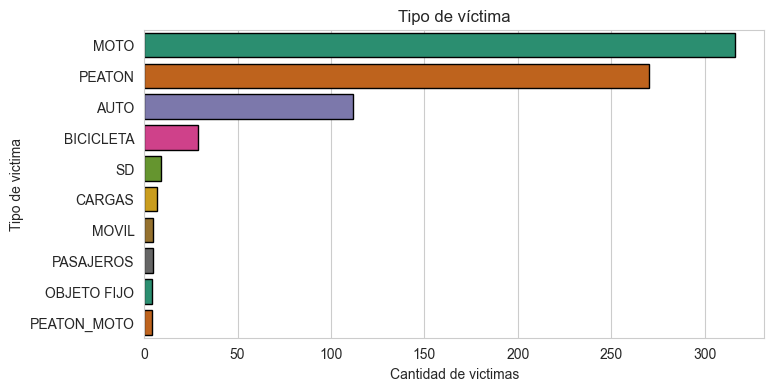

In [237]:
# Configurar el estilo 
sns.set_style("whitegrid")

# Crear el gráfico de barras 
plt.figure(figsize=(8, 4))
sns.barplot(x='cant_victimas', y='victima', data=df_tipo_victima, edgecolor = 'black',palette='Dark2')

# Añadir título y etiquetas
plt.title('Tipo de víctima')
plt.xlabel('Cantidad de victimas')
plt.ylabel('Tipo de victima')

La grafica anterior marca una tendencia fuerte de motorizados y peatones victimas de accidentes fatales, son los mas vulnerables, se sabe que existe la cultura del uso de casco, entonces se debe apuntar a la conciencia a la hora de manejar, implementando politicas de cultura

### Participantes

Se crea un dataframe agrupando la cantidad de victimas por involucrados en el accidente, se hace un top 5 y se grafica en barras horizontales

In [ ]:
df_top5 = df.groupby('participantes')['cant_victimas'].sum().reset_index()
df_top5 = df_top5.sort_values(by= 'cant_victimas',ascending= False).head(5)
df_top5.head()

,participantes,cant_victimas
34,PEATON-PASAJEROS,105
15,MOTO-AUTO,86
17,MOTO-CARGAS,84
30,PEATON-AUTO,83
22,MOTO-PASAJEROS,58


C:\Users\Acer\AppData\Local\Temp\ipykernel_14440\2189220069.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cant_victimas', y='participantes', data=df_top5, edgecolor = 'black',palette='Dark2')


Text(0, 0.5, 'Participantes')

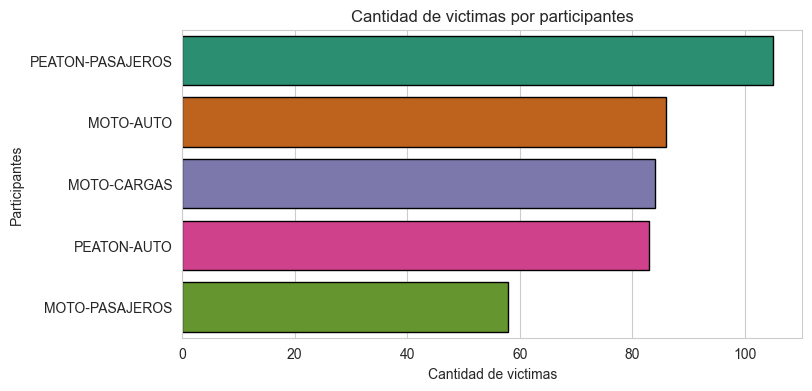

In [238]:
# Configurar el estilo 
sns.set_style("whitegrid")

# Crear el gráfico de barras 
plt.figure(figsize=(8, 4))
sns.barplot(x='cant_victimas', y='participantes', data=df_top5, edgecolor = 'black',palette='Dark2')

# Añadir título y etiquetas
plt.title('Cantidad de victimas por participantes')
plt.xlabel('Cantidad de victimas')
plt.ylabel('Participantes')

Es preocupante que del total de muestros los peotones son protagonistas y las motos, hay que hacer mucho enfasis en crear medidas para el uso de casco,<br> y cultura ciudadana al momento de transitar la ciudad

## Acusado

Un analisis no menor es quien es el acusado u culpable por cada accidente con muertos, son la siguiente grafica de barras se demuestra como es la distribucion

In [229]:

df_acusado = df.groupby('acusado')['cant_victimas'].sum().reset_index()
df_acusado = df_acusado.sort_values(by= 'cant_victimas', ascending= False)
df_acusado.head()

,acusado,cant_victimas
0,AUTO,222
7,PASAJEROS,188
2,CARGAS,158
5,OBJETO FIJO,79
3,MOTO,60


C:\Users\Acer\AppData\Local\Temp\ipykernel_14440\3051843551.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cant_victimas', y='acusado', data=df_acusado, edgecolor = 'black',palette='viridis')


Text(0, 0.5, 'Acusado')

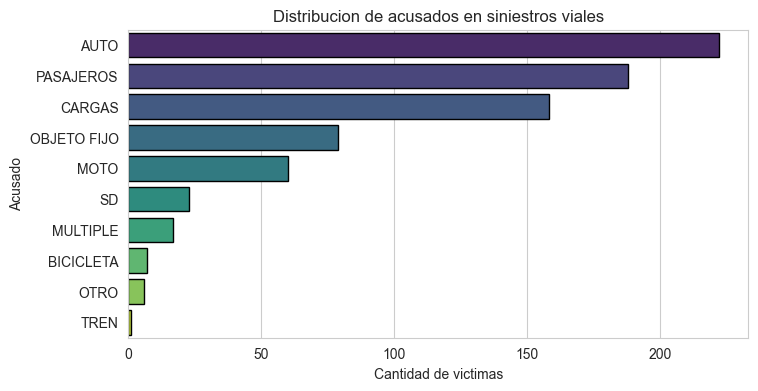

In [231]:
# Configurar el estilo 
sns.set_style("whitegrid")

# Crear el gráfico de barras 
plt.figure(figsize=(8, 4))
sns.barplot(x='cant_victimas', y='acusado', data=df_acusado, edgecolor = 'black',palette='viridis')

# Añadir título y etiquetas
plt.title('Distribucion de acusados en siniestros viales')
plt.xlabel('Cantidad de victimas')
plt.ylabel('Acusado')

En casi la mitad de los accidentes con muerte los acusados son autos, por el tipo de vehiculo son menos vulnerables a morir cuando se sufre un accidente

## Análisis de tiempo
### Víctimas por mes

Se filtra un nuevo dataframe agrupando la cantidad de victimas por mes, me apoyo en un grafico de barras verticales.

In [ ]:
df_mes = df.groupby('mes')['cant_victimas'].sum().reset_index()
df_mes = df_mes.sort_values(by = 'cant_victimas', ascending = False)

C:\Users\Acer\AppData\Local\Temp\ipykernel_14440\4272627950.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mes', y='cant_victimas', edgecolor = 'black', data=df_mes, palette='Set1')


Text(0, 0.5, 'Cantidad de victimas')

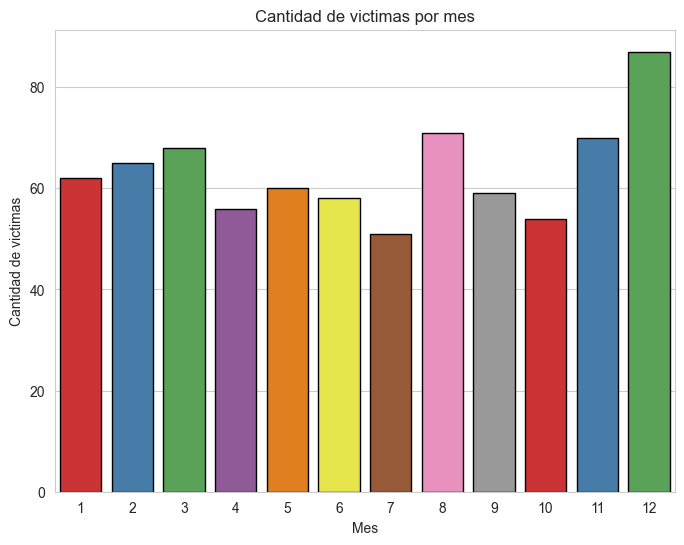

In [244]:
# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='mes', y='cant_victimas', edgecolor = 'black', data=df_mes, palette='Set1')

# Añadir título y etiquetas
plt.title('Cantidad de victimas por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de victimas')

El analisis de victimas por mes no arroja ningún patron o tendencia, los siniestros son constantes durante casi todo el año, sin embargo el mes de diciembre  por temas de festividades se elevan un poco la cantidad de accidentes fatales

### Víctimas por franja horaria

A partir de un dataframe agrupado de cantidad de victimas por franja horaria, se crea una grafica de lineas para ver la evolucion de los accidentes durante cada hora del día

In [ ]:
df_franja = df.groupby('franja_horaria')['cant_victimas'].sum().reset_index()
df_franja.head (3)

,franja_horaria,cant_victimas
0,0,23
1,1,27
2,2,20


Text(0, 0.5, 'Cantidad de victimas')

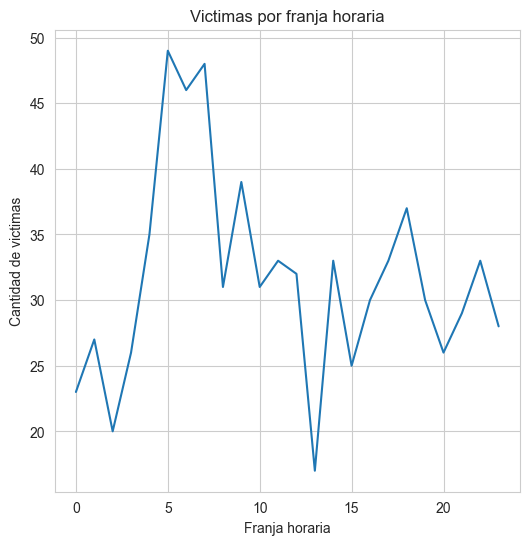

In [ ]:
# Configurar el estilo 
sns.set_style("whitegrid")

# Crear la gráfica de serie de tiempo
plt.figure(figsize=(6, 6))
sns.lineplot(x='franja_horaria', y='cant_victimas', data=df_franja)

# Añadir título y etiquetas
plt.title('Victimas por franja horaria')
plt.xlabel('Franja horaria')
plt.ylabel('Cantidad de victimas')

Claramente se observa un pico de muertes a las 5 am, hr pico de salidas a trabajar entre semana y de fines de semana de personas quizas bajo influencias del alcohol.

### Víctimas por día de la semana

Es importante evaluar si dependiendo del dia de semana ocurren mas accidentes fatale, para ello se sgrupa un dataframe por cantidadad de victimas por dia de la semana

In [ ]:
df_dia = df.groupby('dia_de_la_semana')['cant_victimas'].sum().reset_index()
df_dia = df_dia.sort_values(by= 'cant_victimas', ascending=False)
df_dia.head(5)



,dia_de_la_semana,cant_victimas
3,Sunday,117
2,Saturday,115
0,Friday,112
1,Monday,109
5,Tuesday,105


Text(0, 0.5, 'Cantidad de victimas')

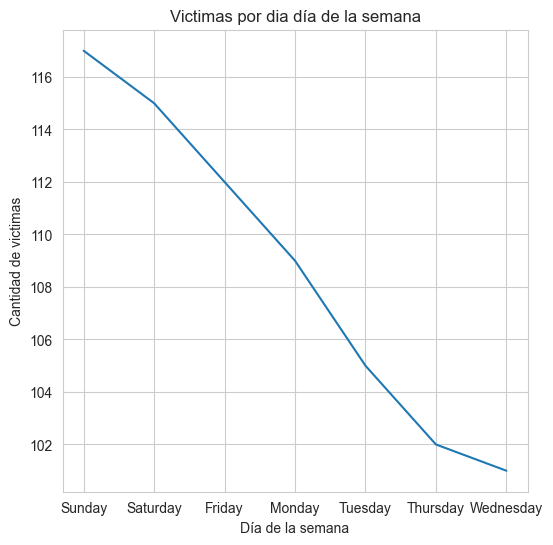

In [ ]:
# Configurar el estilo 
sns.set_style("whitegrid")

# Crear la gráfica de serie de tiempo
plt.figure(figsize=(6, 6))
sns.lineplot(x='dia_de_la_semana', y='cant_victimas', data=df_dia)

# Añadir título y etiquetas
plt.title('Victimas por dia día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de victimas')

Una cantidad importante de siniestros fatales ocurren el domingo, haciendo analogia con la grafica que muestra accidentes por hora podemos concluir que en la madrugada del domingo a causa de fiestas y alcohol se está generando alta ocurrencia de accidentes

## Análisis por ubicacion

Comenzaremos por graficar los tipos de calle con mas siniestros, para ello se usó un grafico de tortas

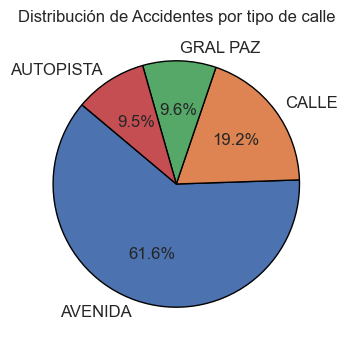

In [243]:
# Calcular el conteo de cada categoría
conteo_tipo_calle = df['tipo_de_calle'].value_counts()

# Configurar la figura
plt.figure(figsize=(4,4))

# Crear el diagrama de pastel
plt.pie(conteo_tipo_calle, labels=conteo_tipo_calle.index, autopct='%1.1f%%', wedgeprops={"linewidth": 1, "edgecolor": "black"}, startangle=140, colors=sns.color_palette('deep'), textprops={'fontsize': 12})

# Añadir título
plt.title('Distribución de Accidentes por tipo de calle')

# Mostrar el diagrama de pastel
plt.show()

Existe un porcentaje muy alto de accidentes en Avenidas, se puede deber a exceso de velocidad, e imprudencia por parte de los conductores, es necesario implemnetar controles de velocidad y mas monitoreo por parte de las autoridades.

### Top 5 de lugares con mas siniestros

Determinar los lugares con mas muertes en accidentes de transito es indispensable para poder proponer mecanismos para salvar vidas, es por ello que se grafica en barras horizontales un top 5 de los lugares con mas riesgos

In [ ]:
df_ubicacion = df.groupby('calle')['cant_victimas'].sum().reset_index()
df_ubicacion = df_ubicacion.sort_values(by = 'cant_victimas', ascending = False).head(5)
df_ubicacion

,calle,cant_victimas
212,"PAZ, GRAL. AV.",69
235,RIVADAVIA AV.,22
108,DEL LIBERTADOR AV.,21
36,AUTOPISTA PERITO MORENO,15
32,AUTOPISTA 25 DE MAYO,14


C:\Users\Acer\AppData\Local\Temp\ipykernel_14440\613250108.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cant_victimas', y='calle', data=df_ubicacion, edgecolor = 'black', palette='viridis')


Text(0, 0.5, 'Tipo de calle')

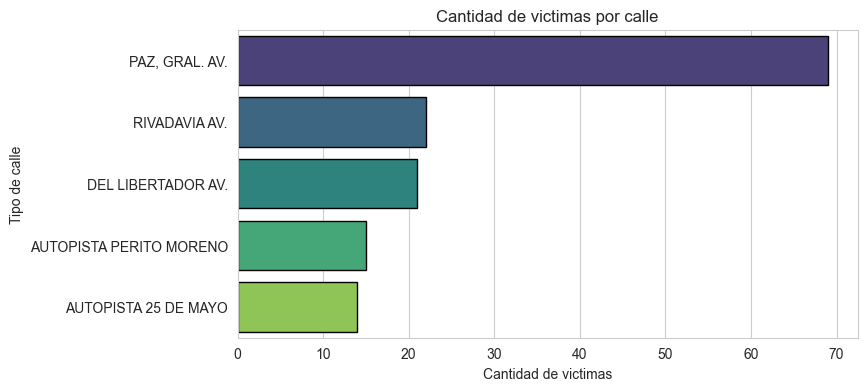

In [ ]:
# Configurar el estilo 
sns.set_style("whitegrid")

# Crear el gráfico de barras 
plt.figure(figsize=(8, 4))
sns.barplot(x='cant_victimas', y='calle', data=df_ubicacion, edgecolor = 'black', palette='viridis')

# Añadir título y etiquetas
plt.title('Cantidad de victimas por calle')
plt.xlabel('Cantidad de victimas')
plt.ylabel('Tipo de calle')

La avenida general paz es una ubicacion critica, el patron y tendencia ameritan que se  tomen medidas de control de forma inmmediata 

### Comunas

Por sector se visualiza las muertes en accidentes de transito por comunas

In [234]:
df_comunas = df.groupby('comuna')['cant_victimas'].sum().reset_index()
df_comunas = df_comunas.sort_values(by= 'cant_victimas', ascending=False)
df_comunas.head(3)

,comuna,cant_victimas
1,1,101
4,4,85
9,9,79


C:\Users\Acer\AppData\Local\Temp\ipykernel_14440\3832381128.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='comuna', y='cant_victimas', edgecolor = 'black', data=df_comunas, palette='Set1')


Text(0, 0.5, 'Cantidad de victimas')

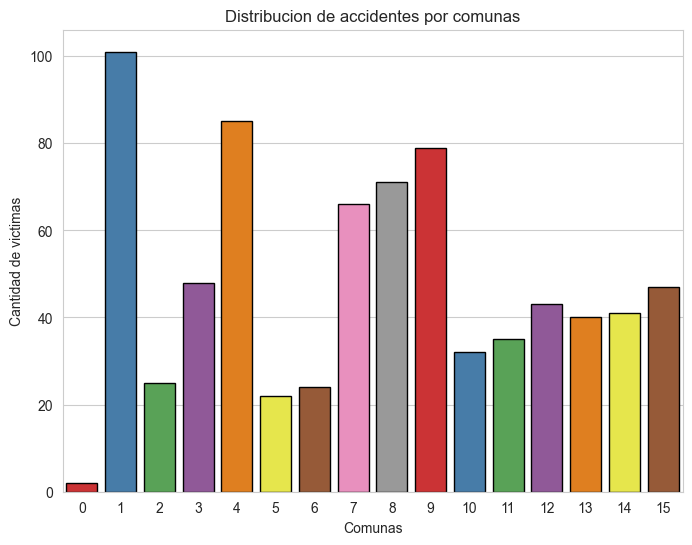

In [240]:
# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='comuna', y='cant_victimas', edgecolor = 'black', data=df_comunas, palette='Set1')

# Añadir título y etiquetas
plt.title('Distribucion de accidentes por comunas')
plt.xlabel('Comunas')
plt.ylabel('Cantidad de victimas')

Las comunas 1, 4, 9 y 8, presentan un patron mas elevado de muertes

## Outliers

### Edad

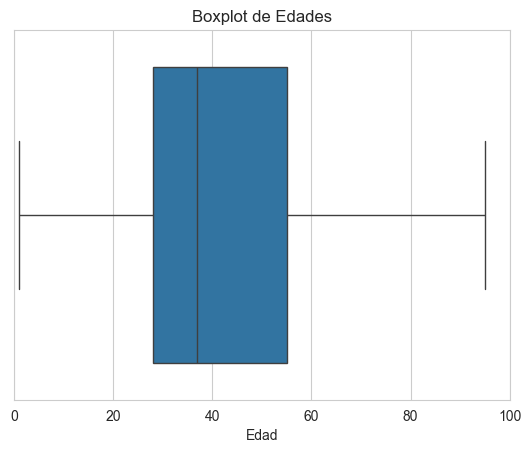

In [224]:
sns.boxplot(x=df['edad'])
plt.title('Boxplot de Edades')
plt.xlabel('Edad')
plt.xlim(0,100)
plt.show()


No existen valores atipicos dentro de la clase 'Edad'

## Hallazgos

* El 76% de las muertes es del género masculino.
* Rango etario de edad de siniestros esta en [27-41] años.
* El top 3 de muerte son de las clases: Moto, peatones y auto.
* Los participantes que mas se repiten o intervienen en un accidente mortal son: Peatpn-pasajeros y Moto-Auto.
* En termnminos de acusado o culpabilidad estan: Autos y pasajeros.
* El mes que mas accidentalidad tiene es Diciembre.
* La hora más critica son a las 5 AM.
* El dia con más probabilidad de accidentes es el domingo de madrugada.
* En las avenidas ocurren el 62% de las muertes.
* La avenida General paz de lejos es la que mas critica de todas.
* Las comunas 1, 4, 9 y 8, presentan un patron mas elevado de muertes.
